### **I INTRODUCTION**

L'objectif de cette analyse est d'étudier une série de facteurs liés à la santé et leurs interconnexions afin de classifier précisément le diabète.

<br>Ces facteurs incluent :

<br>**Âge** : L'âge est un facteur important dans la prédiction du risque de diabète. À mesure que les individus vieillissent, leur risque de développer le diabète augmente. Cela est en partie dû à des facteurs tels qu'une réduction de l'activité physique, des changements dans les niveaux hormonaux et une probabilité plus élevée de développer d'autres conditions de santé qui peuvent contribuer au diabète.

<br>**Genre** : Le genre peut jouer un rôle dans le risque de diabète, bien que l'effet puisse varier. Par exemple, les femmes ayant des antécédents de diabète gestationnel (diabète pendant la grossesse) ont un risque plus élevé de développer un diabète de type 2 plus tard dans la vie. De plus, certaines études ont suggéré que les hommes pourraient avoir un risque légèrement plus élevé de diabète par rapport aux femmes.

<br>**BMI** : L'IMC est une mesure de la graisse corporelle basée sur la taille et le poids d'une personne. Il est couramment utilisé comme un indicateur du statut pondéral global et peut aider à prédire le risque de diabète. Un IMC élevé est associé à une probabilité plus grande de développer un diabète de type 2. Un excès de graisse corporelle, en particulier autour de la taille, peut conduire à une résistance à l'insuline et nuire à la capacité du corps à réguler les niveaux de sucre dans le sang.

<br>**Hypertension** : L'hypertension, ou haute pression sanguine, est une condition qui coexiste souvent avec le diabète. Les deux conditions partagent des facteurs de risque communs et peuvent contribuer au développement l'une de l'autre. Avoir une hypertension augmente le risque de développer un diabète de type 2, et vice versa. Les deux conditions peuvent avoir des effets néfastes sur la santé cardiovasculaire.

<br>**Heart Disease** : Les maladies cardiaques, y compris des conditions telles que la maladie des artères coronaires et l'insuffisance cardiaque, sont associées à un risque accru de diabète. La relation entre la maladie cardiaque et le diabète est bidirectionnelle, ce qui signifie que la présence d'une condition augmente le risque de développer l'autre. Cela est dû au fait qu'elles partagent de nombreux facteurs de risque communs, tels que l'obésité, l'hypertension artérielle et un taux élevé de cholestérol.

<br>**Smoking History**: Le tabagisme est un facteur de risque modifiable pour le diabète. Il a été constaté que le tabagisme augmente le risque de développer un diabète de type 2. Le tabagisme peut contribuer à la résistance à l'insuline et nuire au métabolisme du glucose. Arrêter de fumer peut réduire significativement le risque de développer le diabète et ses complications.

<br>**Niveau d'HbA1c** : L'HbA1c (hémoglobine glyquée) mesure le taux moyen de glucose sanguin sur les 2 à 3 derniers mois. Elle fournit des informations sur le contrôle à long terme du sucre dans le sang. Des niveaux élevés d'HbA1c indiquent un contrôle glycémique médiocre et sont associés à un risque accru de développer le diabète et ses complications.

<br>**Blood Glucose Level** : Le niveau de glucose sanguin se réfère à la quantité de glucose (sucre) présente dans le sang à un moment donné. Des niveaux élevés de glucose sanguin, particulièrement à jeun ou après la consommation de glucides, peuvent indiquer une régulation du glucose altérée et augmenter le risque de développer le diabète. La surveillance régulière des niveaux de glucose sanguin est importante dans le diagnostic et la gestion du diabète.

<br>

Dans cette analyse, nous avons choisi le classificateur RandomForest et la regréssion logistique comme notre modèle.


<br>**Sélection des variables** : k-best offre un moyen simple de trouver l'importance des caractéristiques.


### <b> Importer les bibliothèques

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# K-BEST
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

### <b> Charger les données

In [ ]:
data = pd.read_excel("/content/diabetes_prediction_dataset.xlsx")

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit


# Liste des variables catégorielles pour lesquelles vous voulez stratifier l'échantillon
categorical_variables = ['gender', 'hypertension', 'smoking_history']  # Assurez-vous que ces noms sont corrects

# Initialisation de StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

# DataFrame pour stocker l'échantillon stratifié
df = pd.DataFrame()

for variable in categorical_variables:
    # Assurez-vous que la variable est de type catégorie pour StratifiedShuffleSplit
    data[variable] = data[variable].astype('category')

    # Vérifiez si le nombre de catégories est suffisant pour faire une division
    if data[variable].nunique() > 1:
        # Application de l'échantillonnage stratifié
        for train_index, test_index in sss.split(data, data[variable]):
            sample = data.iloc[test_index]

        # Ajouter l'échantillon pour la variable actuelle au DataFrame final
        df = pd.concat([df, sample], axis=0)
    else:
        print(f"Not enough categories in {variable} to perform stratified sampling.")

# Suppression des doublons si une observation est choisie dans plusieurs strates
df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)

# Affichage des résultats pour vérification
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,59.00,1,1,No Info,28.83,5.00,85,0
1,Female,34.00,0,0,No Info,27.32,5.80,158,0
2,Female,64.00,0,0,never,22.35,5.80,130,0
3,Male,41.00,0,0,No Info,27.32,4.50,200,0
4,Female,35.00,0,0,No Info,25.96,5.70,126,0


In [ ]:
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,59.00,1,1,No Info,28.83,5.00,85,0
1,Female,34.00,0,0,No Info,27.32,5.80,158,0
2,Female,64.00,0,0,never,22.35,5.80,130,0
3,Male,41.00,0,0,No Info,27.32,4.50,200,0
4,Female,35.00,0,0,No Info,25.96,5.70,126,0


#  EDA

## 1. Analyse des données

###Gestion des doublons

In [ ]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 26790 
Number of Columns : 9


In [ ]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [ ]:
df = df.drop_duplicates()

### Unicité

In [ ]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 3398 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


### Valeurs manquantes

In [ ]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### Décrire les données

In [ ]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,26790.00,26790.00,26790.00,26790.00,26790.00,26790.00,26790.00
mean,41.68,0.07,0.04,27.31,5.54,138.17,0.09
std,22.46,0.26,0.20,6.74,1.07,40.98,0.28
min,0.08,0.00,0.00,10.08,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.52,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.67,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

##  2.Analyse univariée

###Histogrammes

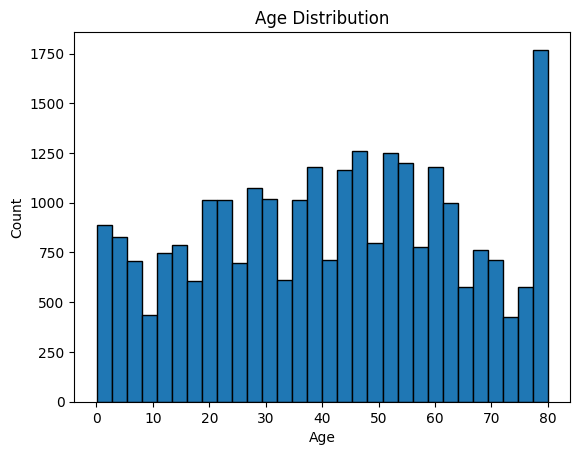

In [ ]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

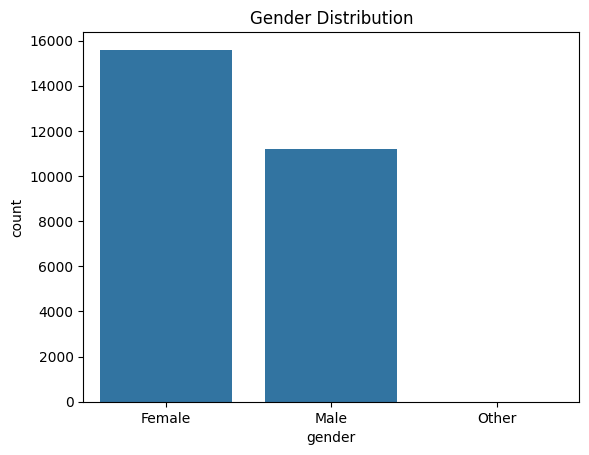

In [ ]:
# Bar plot for gender
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


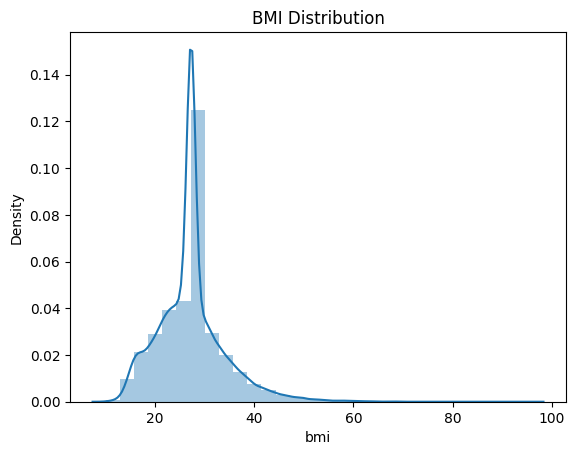

In [ ]:

# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

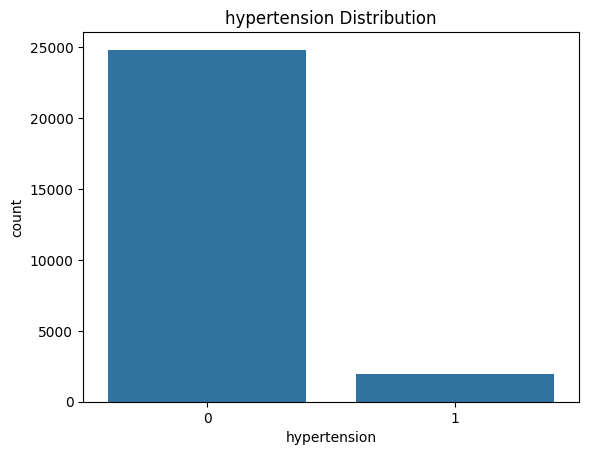

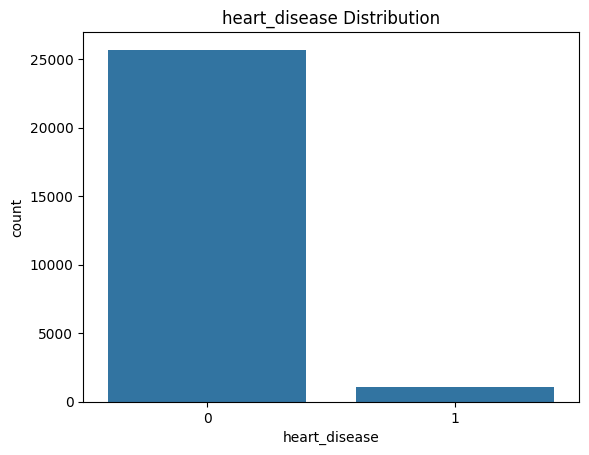

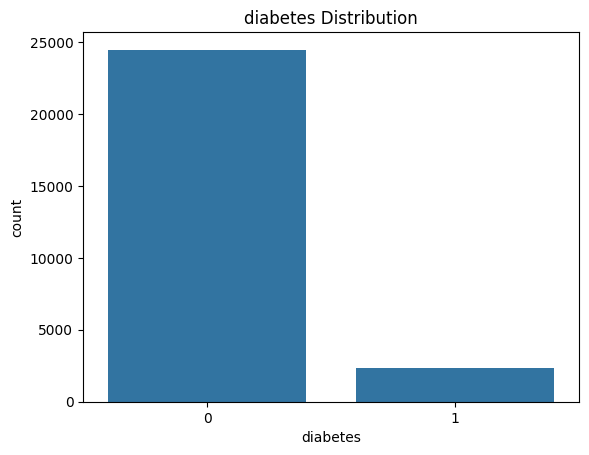

In [ ]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

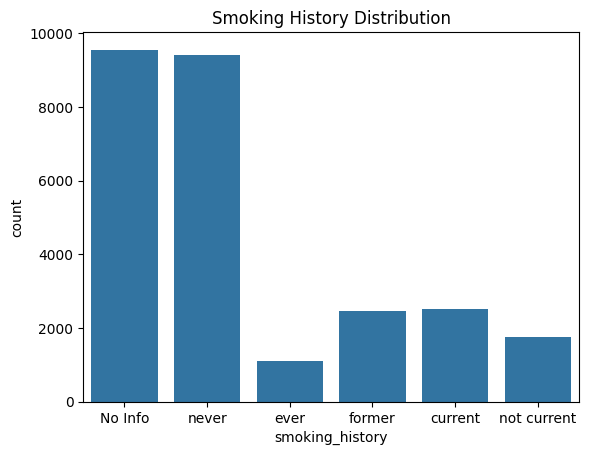

In [ ]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

##  3.Analyse bivariée
### Boxplot X vs Diabetes classification

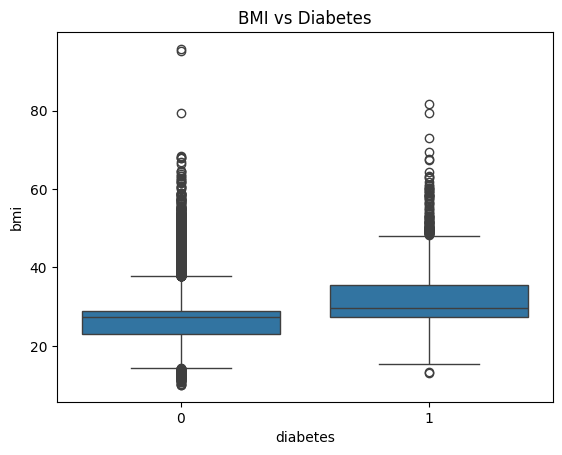

In [ ]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

Les personnes qui ont le plus souvent le diabète présentent un indice de masse corporelle (IMC) plus élevé

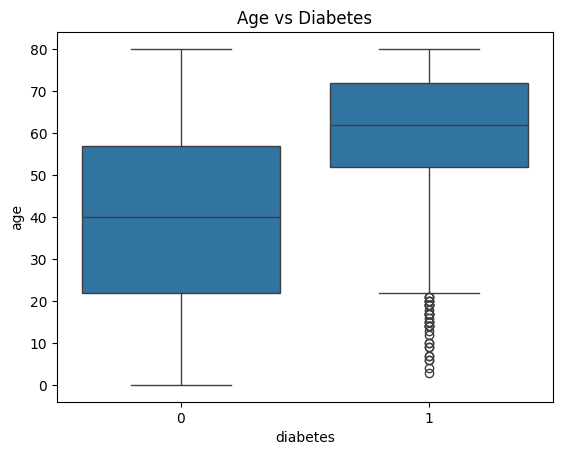

In [ ]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

La tranche d'âge qui compte le plus de cas de diabète est celle de 55 à 80 ans

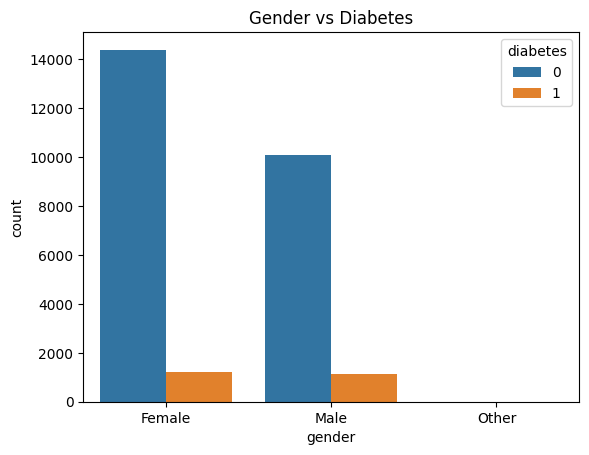

In [ ]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

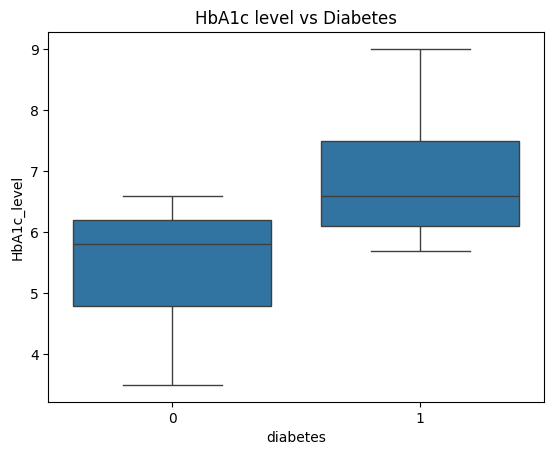

In [ ]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()


Les personnes qui sont le plus souvent atteintes de diabète présentent un niveau de HbA1c plus élevé

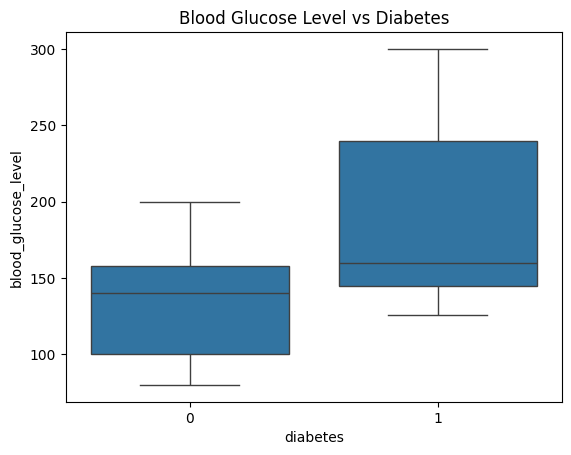

In [ ]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

## 4. Analyse multivariées</span></b> </div>



###  Interaction entre genre, Age et diabetes

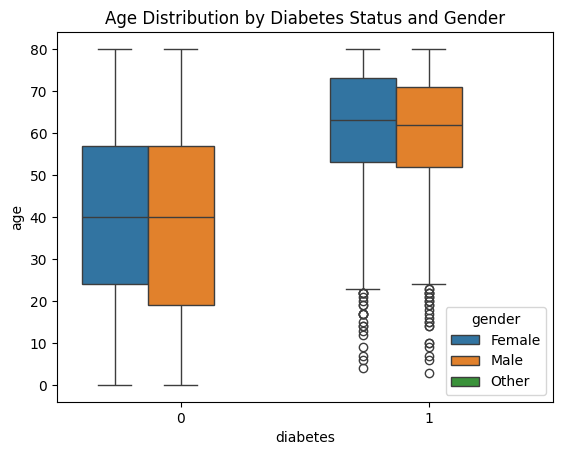

In [ ]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

Les femmes sont légèrement plus atteintes de diabète que les hommes



# Préparation des données

In [ ]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     18974
past_smoker     5303
current         2509
Name: count, dtype: int64


In [ ]:
data = df.copy()

### | **Encoding**

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

In [ ]:
# Gestion des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Séparation des données
X = data.drop('diabetes', axis=1)  # Remplacez 'target_column' par le nom de votre variable cible
y = data['diabetes']

# Définir le nombre de caractéristiques à sélectionner
k = 6 # ou un autre nombre selon votre besoin

# Appliquer SelectKBest avec mutual_info_regression comme score_func
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_new = selector.fit_transform(X, y)

# Afficher les scores pour chaque caractéristique
selected_features = selector.get_support(indices=True)
print("Variable sélectionnées :")
for i in selected_features:
    print(X.columns[i])

Variable sélectionnées :
age
heart_disease
bmi
HbA1c_level
blood_glucose_level
gender_Other


### <b><span style='color:#16C2D5'>|</span> Intepret the results </b>

SelectKBest est utilisé avec mutual_info_regression pour sélectionner les k meilleures variables basées sur le score de l'information mutuelle, qui mesure la dépendance entre chaque variable explicative et la variable cible. Cette méthode peut efficacement identifier les variables les plus pertinentes pour la prédiction.

#### Les variables choisies, en se basant sur leur importance pour prédire le diabète

1. **`HbA1c_level`**

2. **`The blood_glucose_level`**

3. **`Age`**
4. **`BMI`**

5. **`Gender`**
6.  **`heart_disease`**


### <b> Matrice de Correlation

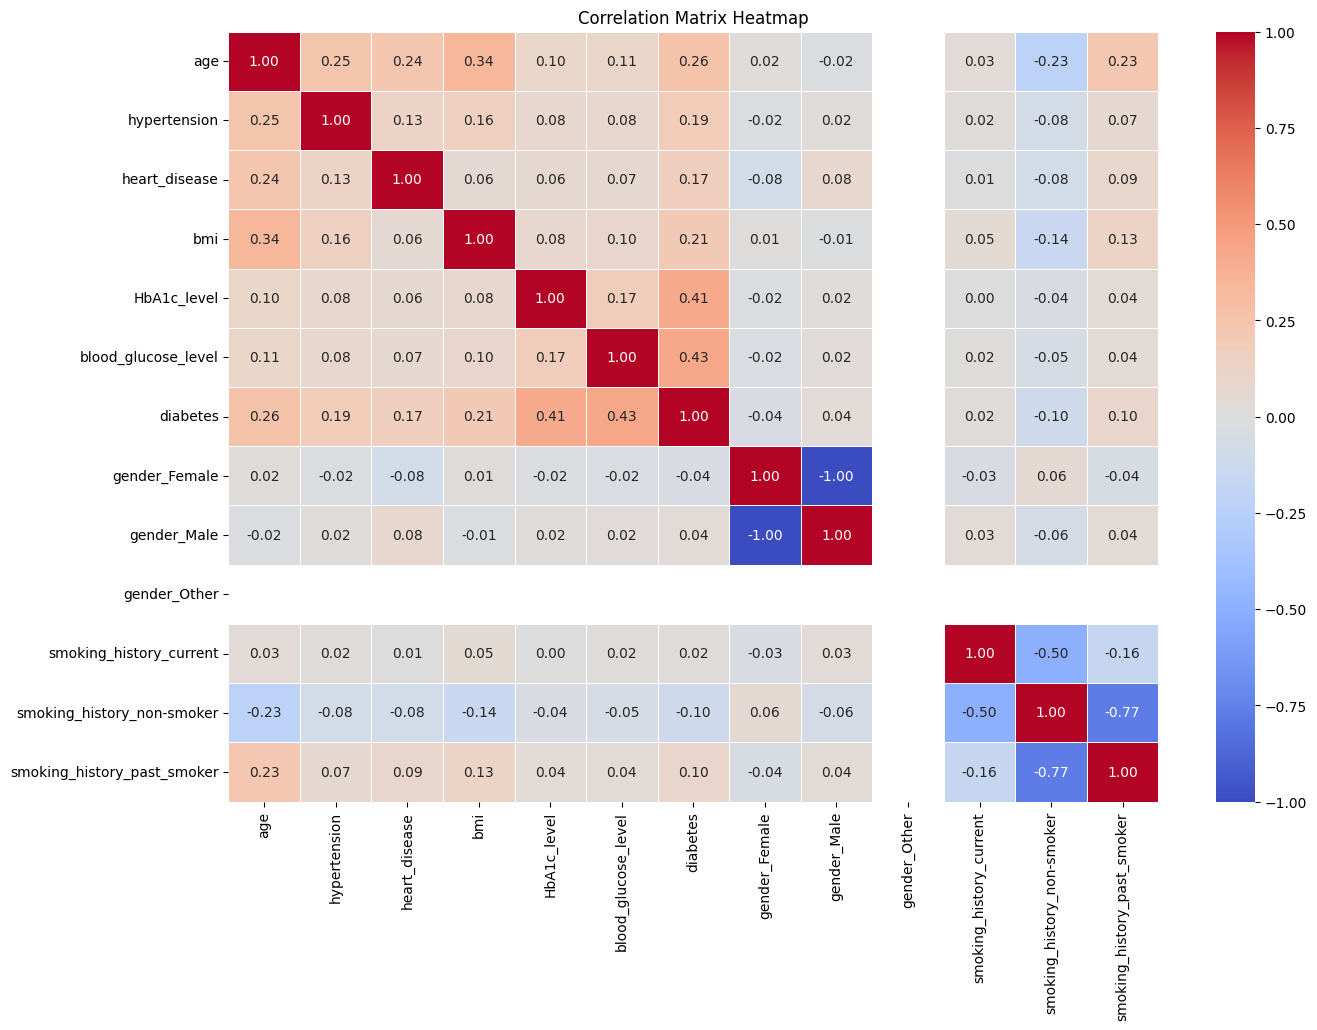

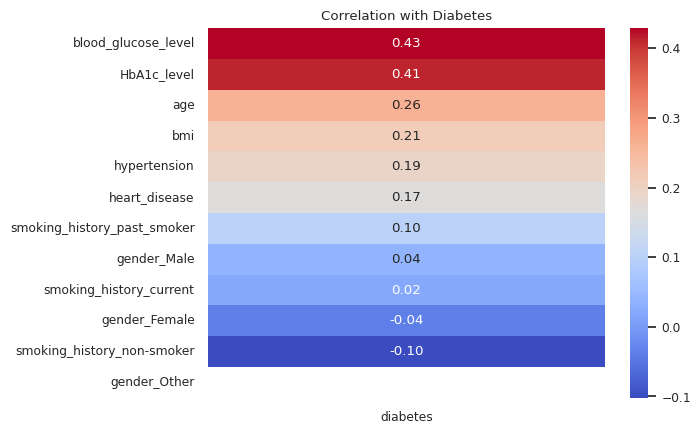

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

Les niveaux de glucose sanguin (blood_glucose_level) et les niveaux d'HbA1c (HbA1c_level) sont les variables les plus corrélées avec le diabète.

#  Analyse prédictive

D'après EDA , l'ensemble de données est déséquilibré (avec 9 % de cas positifs pour le diabète et 91 % de cas négatifs), il est essentiel d'équilibrer les données pour garantir que le modèle ne soit pas biaisé en faveur de la classe majoritaire. À cet effet, la technique de suréchantillonnage de la minorité synthétique (SMOTE) est utilisée, qui génère des échantillons synthétiques pour la classe minoritaire.

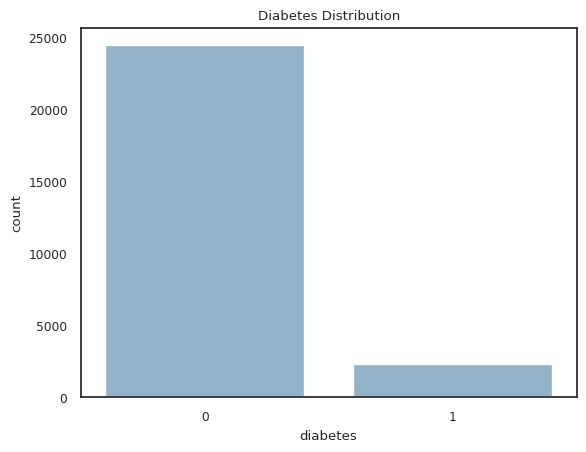

In [ ]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [ ]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

L'utilisation combinée de ces deux techniques permet d'équilibrer les classes de manière plus nuancée et efficace. D'abord, SMOTE augmente le nombre d'observations dans la classe minoritaire de 10% pour réduire le déséquilibre. Ensuite, RandomUnderSampler réduit la classe majoritaire de 50% pour parfaire cet équilibre sans la rendre trop petite, en maintenant une certaine robustesse des données.

In [ ]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])
# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

### Model Building

In [ ]:
models_params = {
    'LogisticRegression': {
        'model': LogisticRegression(solver='liblinear', max_iter=100),
        'params': {'classifier__C': [0.1, 1, 10]}
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 10, 20],
            'classifier__min_samples_leaf': [1, 5, 10]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    }
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
trained_models = {}

for name, config in models_params.items():
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('over', over),
        ('under', under),
        ('classifier', config['model'])
    ])

    grid_search = GridSearchCV(pipeline, config['params'], cv=5)
    grid_search.fit(X_train, y_train)
    trained_models[name] = grid_search  # Stockage du modèle entraîné

    print(f"Meilleurs paramètres pour {name}: {grid_search.best_params_}")

Meilleurs paramètres pour LogisticRegression: {'classifier__C': 10}
Meilleurs paramètres pour DecisionTreeClassifier: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Meilleurs paramètres pour RandomForestClassifier: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


**Random Forest Classifier :**


**Profondeur maximale de 10 :** Cela indique que la profondeur maximale des arbres dans la forêt est de 10 niveaux. Limiter la profondeur de l'arbre aide à réduire le surajustement.


**Min_samples_leaf de 4 :** Cela signifie que chaque feuille doit contenir au moins 4 échantillons.

**Min_samples_split de 2 :** Cela nous indique qu'un nœud doit contenir au moins 2 échantillons pour être divisé

**N_estimators de 100 :** C'est le nombre d'arbres de décision dans la forêt.

**Decision Tree Classifier :**

 **`classifier__criterion`: 'entropy'** - Ce paramètre détermine la fonction utilisée pour mesurer la qualité d'une scission. Le critère 'entropy' est utilisé pour le gain d'information, ce qui signifie que chaque division dans l'arbre cherche à maximiser la réduction d'entropie
 **`classifier__max_depth`: 10** - La profondeur maximale de l'arbre est limitée à 10 niveaux.

**`classifier__min_samples_leaf`: 1** - Ce paramètre spécifie que le nombre minimum d'échantillons requis pour être à une feuille est de 1. Cela permet à chaque feuille d'avoir un niveau de granularité très fin, ce qui peut augmenter la sensibilité de l'arbre aux données

 **`classifier__min_samples_split`: 2** - Ce paramètre indique que pour qu'un nœud  doit contenir au moins 2 échantillons.







In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_test, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Fonction pour prédire, évaluer et afficher les résultats de chaque modèle

def evaluate_model(name, model, X_test, y_test):
    print(f"\n{name}")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


LogisticRegression
Accuracy: 0.9300111982082867
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      4899
           1       0.56      0.80      0.66       459

    accuracy                           0.93      5358
   macro avg       0.77      0.87      0.81      5358
weighted avg       0.94      0.93      0.94      5358



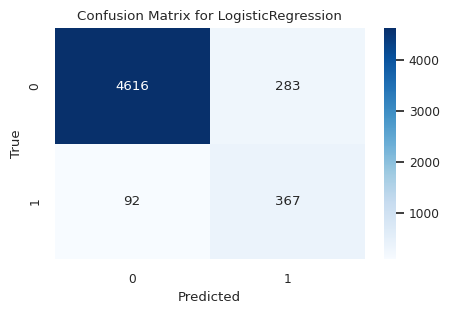

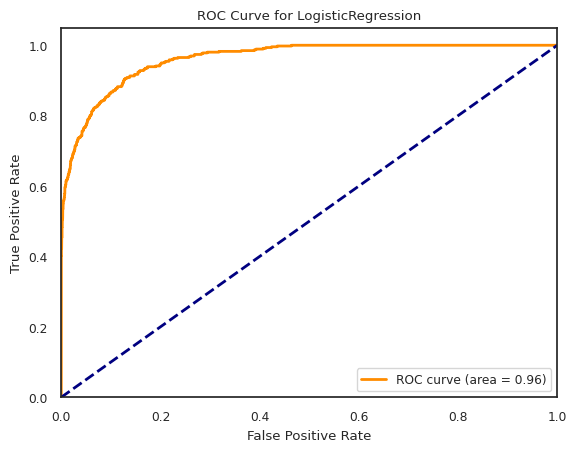


DecisionTreeClassifier
Accuracy: 0.9412094064949608
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4899
           1       0.62      0.82      0.71       459

    accuracy                           0.94      5358
   macro avg       0.80      0.89      0.84      5358
weighted avg       0.95      0.94      0.94      5358



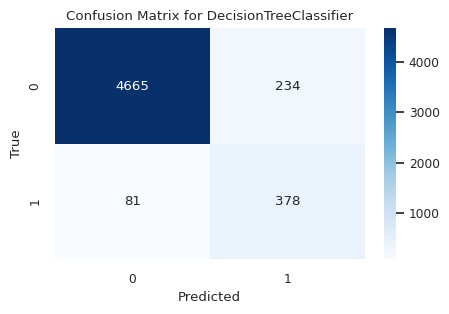

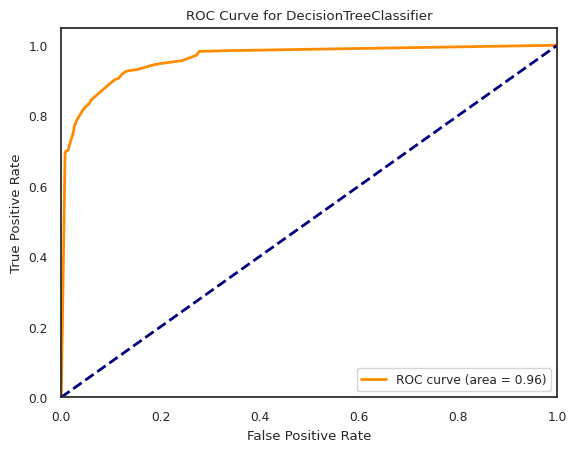


RandomForestClassifier
Accuracy: 0.9544606196341918
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4899
           1       0.71      0.79      0.75       459

    accuracy                           0.95      5358
   macro avg       0.84      0.88      0.86      5358
weighted avg       0.96      0.95      0.96      5358



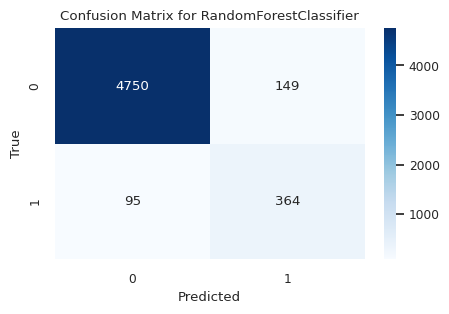

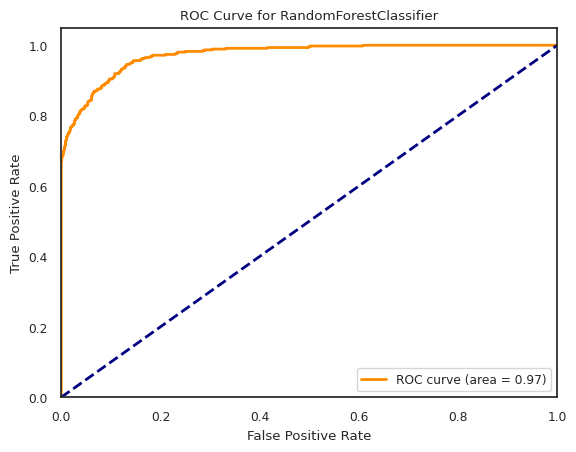

In [ ]:
# Évaluation de chaque modèle
for name, model in trained_models.items():
    evaluate_model(name, model, X_test, y_test)
    if hasattr(model.best_estimator_.named_steps['classifier'], "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # score = probabilité de la classe positive
    else:
        y_scores = model.decision_function(X_test)

    plot_roc_curve(y_test, y_scores, name)

### <b><span style='color:#16C2D5'>|</span> Intepret the results </b>



## Feature Importance

                        Feature  Importance
2                   HbA1c_level        0.41
3           blood_glucose_level        0.32
0                           age        0.14
1                           BMI        0.07
4                  hypertension        0.02
5                 heart_disease        0.02
9    smoking_history_non-smoker        0.01
10  smoking_history_past_smoker        0.00
6                 gender_Female        0.00
7                   gender_Male        0.00
8       smoking_history_current        0.00


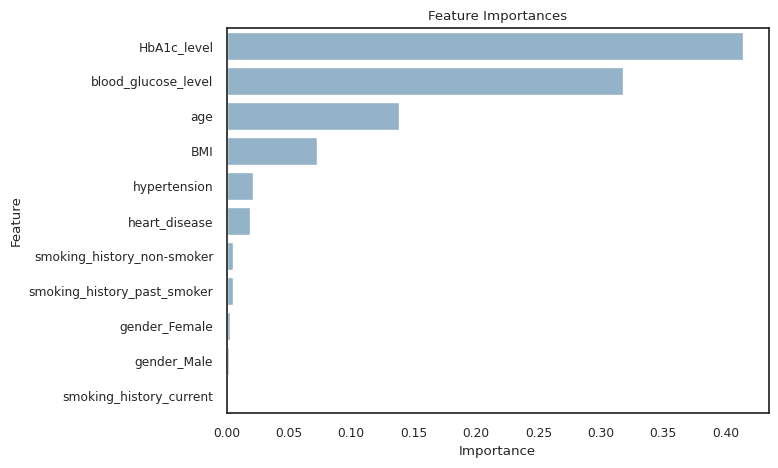

In [ ]:
# After fitting the model, we input feature names
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(7, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

### <b><span style='color:#16C2D5'>|</span> Interpréter les résultats </b>

Les résultats sur l'importance des caractéristiques fournissent des indications sur les éléments les plus influents dans la prédiction du diabète à l'aide de notre Modèle Random forest. L'importance d'une caractéristique est calculée en fonction de la réduction d'impureté apportée par les nœuds d'arbres qui utilisent cette caractéristique à travers tous les arbres de la forêt.

#### **<span style='color:#16C2D5'>Voici les principales conclusions des résultats sur l'importance des caractéristiques :</span>**

1. **`HbA1c_level`** est la caractéristique la plus importante avec une importance de 0.41. HbA1c est une mesure des niveaux moyens de glucose dans le sang sur les 2 à 3 derniers mois, il n'est donc pas surprenant qu'il s'agisse d'un indicateur significatif du diabète.

2. **`Le taux de glucose sanguin`** est la deuxième caractéristique la plus importante avec une importance de 0.32. Cela correspond aux connaissances médicales, puisque les niveaux de glucose dans le sang sont directement utilisés pour diagnostiquer le diabète.

3. **`L'âge`** est la troisième caractéristique la plus importante avec une importance de 0.14. Il est bien connu que le risque de diabète de type 2 augmente avec l'âge.

4. **`L'IMC`** (Indice de Masse Corporelle) arrive en quatrième position en termes d'importance avec 0.07. L'IMC est un facteur de risque clé pour le diabète, et son rôle est bien documenté dans la littérature médicale.

5. D'autres caractéristiques comme **`l'hypertension`** et **`la maladie cardiaque`** montrent une certaine importance (0,02 et 0,02 respectivement), indiquant que ces conditions de santé pourraient avoir une certaine pertinence dans la prédiction du diabète, bien qu'elles ne soient pas aussi significatives que les quatre principaux facteurs.

6. **`L'historique du tabagisme`** ('smoking_history_non-smoker', 'smoking_history_past_smoker', 'smoking_history_current') et **`le genre`** ('gender_Female', 'gender_Male') sont montrés comme ayant une importance minime ou nulle dans notre modèle. Cela pourrait être dû à plusieurs raisons, y compris le fait que ces facteurs peuvent ne pas être aussi influents dans le développement du diabète ou cela pourrait être le résultat de la manière dont les données ont été collectées ou structurées.
